<h1><center>DS 5500 Homework 2</center></h1>

<h2><center>Problem 1</center></h2>

Project group:
https://piazza.com/class/k05u5i0wc3w540?cid=242

<h2><center>Problem 4</center></h2>

In [125]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gdp_pc = pd.read_csv('/Users/kumar/Downloads/DS5500/Homework/HW1/income_per_person_gdppercapita_ppp_inflation_adjusted.csv', usecols=['country'] + [str(x) for x in list(range(1800,2019))])
gdp_pc = gdp_pc.set_index('country').stack().reset_index().rename(columns={'level_1':'year',0:'gdp'})

life_exp = pd.read_csv('/Users/kumar/Downloads/DS5500/Homework/HW1/life_expectancy_years.csv')
life_exp = life_exp.set_index('country').stack().reset_index().rename(columns={'level_1':'year',0:'life_expectancy'})

child_mor = pd.read_csv('/Users/kumar/Downloads/DS5500/Homework/HW1/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mor = child_mor.set_index('country').stack().reset_index().rename(columns={'level_1':'year',0:'child_mortality'})

gdp_le_cm = gdp_pc.merge(life_exp.merge(child_mor, on=['country', 'year'], how='inner') , on=['country', 'year'], how='inner')

# Geographical location information
geo_data = pd.read_csv('/Users/kumar/Downloads/DS5500/Homework/HW1/country_list_main.csv', 
                       index_col=False,
                       usecols=['Continent_Name','name', 'iso3166_1_alpha3'])

gdp_le_cm = pd.merge(gdp_le_cm, geo_data, how='left', left_on='country', right_on='name').drop(columns='name')
gdp_le_cm.rename(columns={'Continent_Name':'Continent'}, inplace=True)
gdp_le_cm = gdp_le_cm.groupby('year')['gdp', 'life_expectancy','child_mortality'].mean().reset_index()

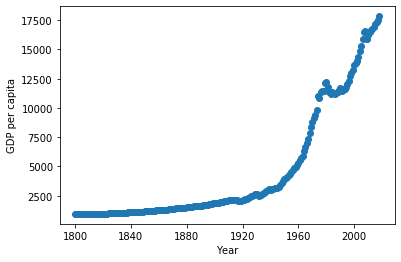

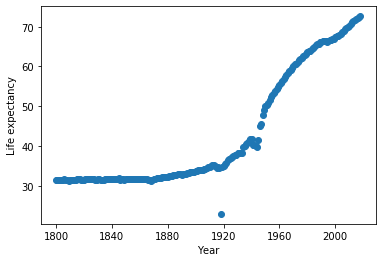

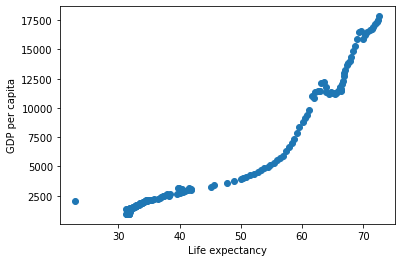

In [126]:
plt.plot_date(pd.to_datetime(gdp_le_cm['year']),gdp_le_cm['gdp'])
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

plt.plot_date(pd.to_datetime(gdp_le_cm['year']),gdp_le_cm['life_expectancy'])
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.show()

plt.scatter(gdp_le_cm['life_expectancy'],gdp_le_cm['gdp'],  marker='o')
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.show()

Variance score:  0.9271150642714534
RMSE:  15.119282928104564
Ceofficient:  0.002809702284488896 Intercept:  30.171525735007457
p-value:  2.216592608140804e-125


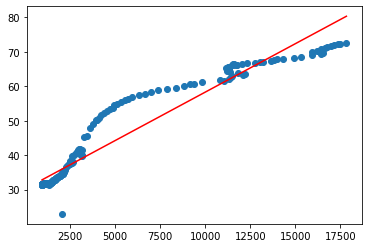

In [132]:
x = gdp_le_cm['gdp'].values.reshape(-1,1)
y = gdp_le_cm['life_expectancy'].values.reshape(-1,1)
reg = LinearRegression(normalize=True).fit(x, y)
y_pred = reg.predict(x)

print('Variance score: ', r2_score(y,y_pred))
print('RMSE: ', mean_squared_error(y,y_pred))
print('Ceofficient: ', reg.coef_[0][0], 'Intercept: ', reg.intercept_[0])
print('p-value: ', f_regression(x,y.ravel())[1][0])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

Variance score:  0.9582865767236582
RMSE:  8.653050758852201
Ceofficient:  14.59721510610173 Intercept:  -72.60689059527073
p-value:  1.1023098435602511e-151


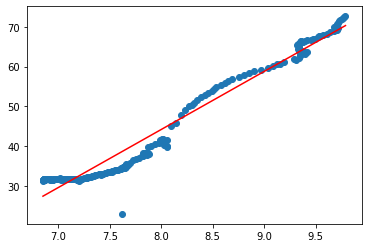

In [133]:
x = np.log(gdp_le_cm['gdp']).values.reshape(-1,1)
y = gdp_le_cm['life_expectancy'].values.reshape(-1,1)
reg = LinearRegression(normalize=True).fit(x, y)
y_pred = reg.predict(x)

print('Variance score: ', r2_score(y,y_pred))
print('RMSE: ', mean_squared_error(y,y_pred))
print('Ceofficient: ', reg.coef_[0][0], 'Intercept: ', reg.intercept_[0])
print('p-value: ', f_regression(x,y.ravel())[1][0])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

Variance score:  0.8841384141856842
RMSE:  0.010967874523825255
Ceofficient:  5.8613601697617284e-05 Intercept:  3.4435140635621724
p-value:  1.5744271337209416e-103


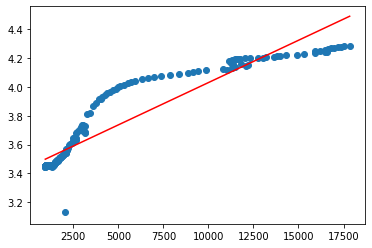

In [134]:
x = gdp_le_cm['gdp'].values.reshape(-1,1)
y = np.log(gdp_le_cm['life_expectancy']).values.reshape(-1,1)
reg = LinearRegression(normalize=True).fit(x, y)
y_pred = reg.predict(x)

print('Variance score: ', r2_score(y,y_pred))
print('RMSE: ', mean_squared_error(y,y_pred))
print('Ceofficient: ', reg.coef_[0][0], 'Intercept: ', reg.intercept_[0])
print('p-value: ', f_regression(x,y.ravel())[1][0])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

<h2><center>Problem 5</center></h2>

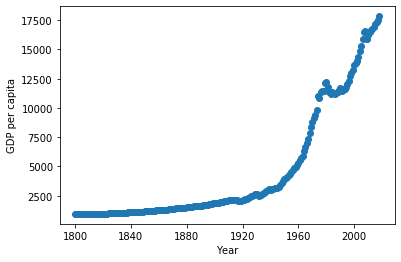

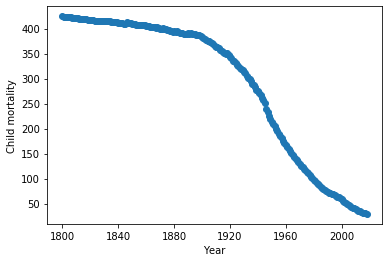

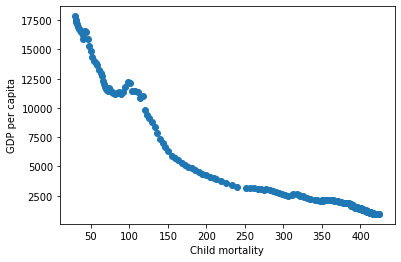

In [136]:
plt.plot_date(pd.to_datetime(gdp_le_cm['year']),gdp_le_cm['gdp'])
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

plt.plot_date(pd.to_datetime(gdp_le_cm['year']),gdp_le_cm['child_mortality'])
plt.xlabel('Year')
plt.ylabel('Child mortality')
plt.show()

plt.scatter(gdp_le_cm['child_mortality'],gdp_le_cm['gdp'],  marker='o')
plt.xlabel('Child mortality')
plt.ylabel('GDP per capita')
plt.show()

Variance score:  0.8982643208680533
RMSE:  1961.208107674287
Ceofficient:  -0.026660853399524023 Intercept:  412.8161119835176
p-value:  1.1671731165543116e-109


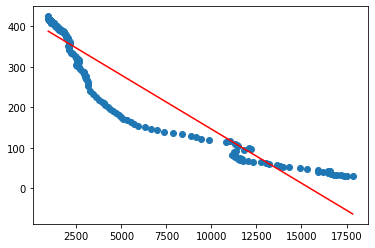

In [137]:
x = gdp_le_cm['gdp'].values.reshape(-1,1)
y = gdp_le_cm['child_mortality'].values.reshape(-1,1)
reg = LinearRegression(normalize=True).fit(x, y)
y_pred = reg.predict(x)

print('Variance score: ', r2_score(y,y_pred))
print('RMSE: ', mean_squared_error(y,y_pred))
print('Ceofficient: ', reg.coef_[0][0], 'Intercept: ', reg.intercept_[0])
print('p-value: ', f_regression(x,y.ravel())[1][0])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

Variance score:  0.9813608316473261
RMSE:  359.31630284945936
Ceofficient:  -142.4016927586835 Intercept:  1418.8922643020692
p-value:  1.1982196895413576e-189


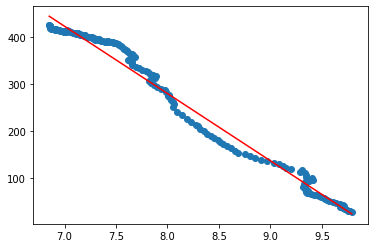

In [138]:
x = np.log(gdp_le_cm['gdp']).values.reshape(-1,1)
y = gdp_le_cm['child_mortality'].values.reshape(-1,1)
reg = LinearRegression(normalize=True).fit(x, y)
y_pred = reg.predict(x)

print('Variance score: ', r2_score(y,y_pred))
print('RMSE: ', mean_squared_error(y,y_pred))
print('Ceofficient: ', reg.coef_[0][0], 'Intercept: ', reg.intercept_[0])
print('p-value: ', f_regression(x,y.ravel())[1][0])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

Variance score:  0.984536156372031
RMSE:  0.009099420491210885
Ceofficient:  -0.0001542093667463525 Intercept:  6.167572988086856
p-value:  1.8945503033757502e-198


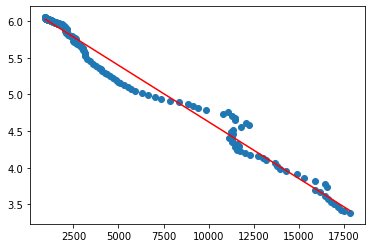

In [139]:
x = gdp_le_cm['gdp'].values.reshape(-1,1)
y = np.log(gdp_le_cm['child_mortality']).values.reshape(-1,1)
reg = LinearRegression(normalize=True).fit(x, y)
y_pred = reg.predict(x)

print('Variance score: ', r2_score(y,y_pred))
print('RMSE: ', mean_squared_error(y,y_pred))
print('Ceofficient: ', reg.coef_[0][0], 'Intercept: ', reg.intercept_[0])
print('p-value: ', f_regression(x,y.ravel())[1][0])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()